In [3]:
from tensorflow.keras.applications import MobileNetV2

In [4]:
base_model =MobileNetV2(input_shape=(160,160,3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 65s 7us/step


In [42]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [43]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
from tensorflow.keras.layers import Dropout

In [44]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x) #dense layer 2
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [45]:
from tensorflow.keras.models import Model

In [46]:
model=Model(inputs=base_model.input,outputs=preds)

In [47]:
model.load_weights('SixthTraining.h5')

Now hoping that model is set and ready let us see how the model is performing on data

In [48]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical


In [49]:
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os


In [50]:
print("[INFO] loading images...")
data = []
labels = []


[INFO] loading images...


In [51]:
imagePaths = sorted(list(paths.list_images('dataset')))
random.seed(42)
random.shuffle(imagePaths)


In [52]:
len(imagePaths)

196

Try making image size as 160 X 160

In [53]:
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
#     print("&")
#     print(imagePath)
    image = cv2.resize(image, (160,160))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    label = 1 if label == "cricket" else 0
    labels.append(label)


In [54]:
labelDict={}
labelDict[1]="cricket"
labelDict[0]="baseball"

In [55]:
def plotImage(data,label):
    plt.figure()
    plt.imshow((data * 255).astype(np.uint8))
    plt.title(labelDict[label])

In [56]:
print(len(labels))
len(data)

196


196

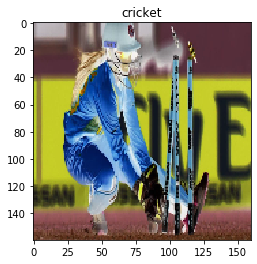

In [57]:
plotImage(data[0],labels[0])

In [58]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [59]:
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)

In [60]:
type(trainX)

numpy.ndarray

In [61]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)


In [62]:
trainY[0]

array([0., 1.], dtype=float32)

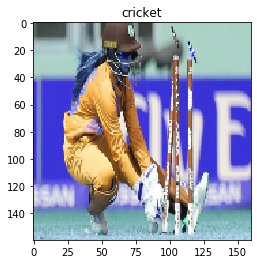

In [63]:
plotImage(data[0],labels[0])

In [66]:
def seeResults(data,labels,predicts):
  num_rows = 6
  num_cols = 3
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(6,3,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(data[i])

    c=''
    if ((labels[i]=='cricket' and predicts[i]=='cricket') or (labels[i]=='baseball' and predicts[i]=='baseball')):
      c='green'
    else:
      c='red'
    
    plt.xlabel("Predicted= {}, Correct is {} ".format(predicts[i],labels[i]),
                                color=c)
  plt.tight_layout()
  plt.show()

In [64]:
def getResults(data,labels):
  print(len(data))
  predictions=model.predict(data)
  print(len(predictions))
  Labels=[]
  Predictions=[]
  i=0
  for p in predictions:
    if(p[0]>p[1]):
      Predictions.append("baseball")
      Labels.append("baseball" if labels[i][0]==1 else "cricket")
    else:
      Predictions.append("cricket")
      Labels.append("cricket" if labels[i][1]==1 else "baseball")
    i=i+1
  print('Labels are ',len(Labels),'and Preds',len(Predictions))
  seeResults(data,Labels,Predictions)

18
18
Labels are  18 and Preds 18


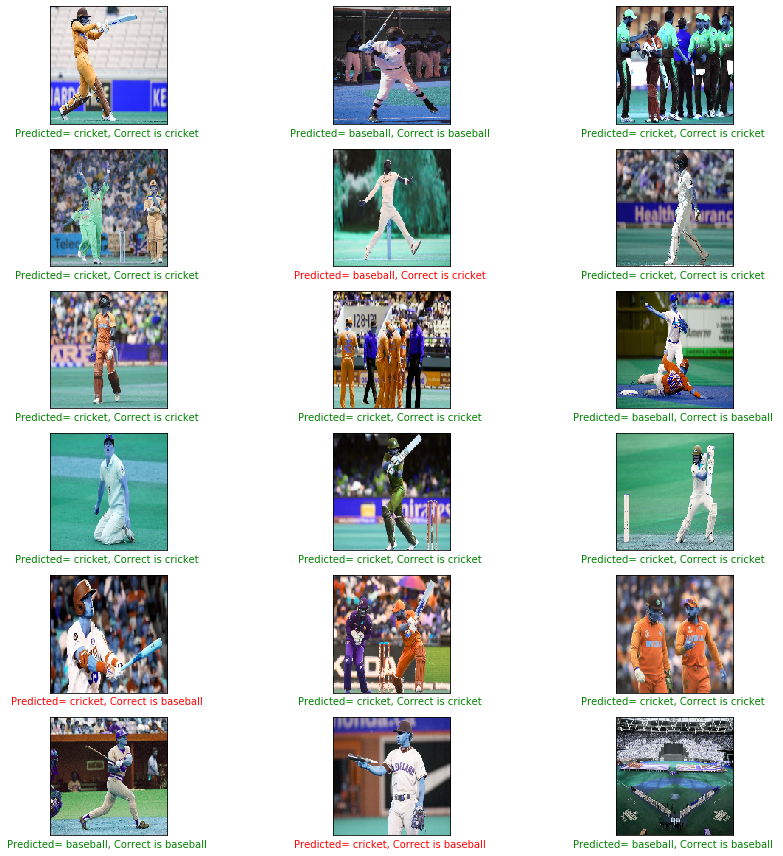

In [67]:
getResults(testX[18:36],testY[18:36])

Yeah the model is imported successfully

In [80]:
indx=input()
indx=int(indx)
res=model.predict(np.expand_dims(testX[indx], axis=0))
if res[0][0]>res[0][1]:
    print("Baseball")
else:
    print("Cricket")

20
Cricket


#### Let us plot the image sizes and see what would be perfect image size in preprocessing

https://stackoverflow.com/questions/6444548/how-do-i-get-the-picture-size-with-pil

In [81]:
from PIL import Image
# im = Image.open('whatever.png')
# width, height = im.size

In [84]:
dim_dict={}
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = Image.open(imagePath)
    width, height =image.size
    if "{} X {} ".format(width,height) in dim_dict:
        dim_dict["{} X {} ".format(width,height)] +=1 
    dim_dict["{} X {} ".format(width,height)] =1

In [86]:
len(dim_dict.keys())

147

([<matplotlib.axis.XTick at 0x1beb23137f0>,
 <a list of 147 Text xticklabel objects>)

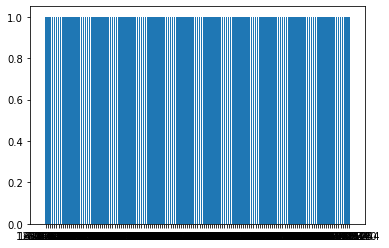

In [89]:
plt.bar(range(len(dim_dict)), list(dim_dict.values()), align='center')
plt.xticks(range(len(dim_dict)), list(dim_dict.keys()))

It seems that no common image dimension is available, so bad lucky

In [90]:
dim_dict

{'1280 X 720 ': 1,
 '1600 X 900 ': 1,
 '638 X 430 ': 1,
 '420 X 235 ': 1,
 '644 X 441 ': 1,
 '976 X 548 ': 1,
 '1200 X 800 ': 1,
 '1416 X 797 ': 1,
 '1024 X 692 ': 1,
 '1400 X 933 ': 1,
 '600 X 338 ': 1,
 '3482 X 2611 ': 1,
 '384 X 216 ': 1,
 '1500 X 1000 ': 1,
 '1600 X 1145 ': 1,
 '2500 X 1902 ': 1,
 '1580 X 900 ': 1,
 '2501 X 1564 ': 1,
 '300 X 180 ': 1,
 '575 X 431 ': 1,
 '1220 X 600 ': 1,
 '1396 X 785 ': 1,
 '1600 X 1218 ': 1,
 '1170 X 630 ': 1,
 '1240 X 640 ': 1,
 '896 X 504 ': 1,
 '1200 X 630 ': 1,
 '990 X 500 ': 1,
 '624 X 426 ': 1,
 '800 X 535 ': 1,
 '770 X 433 ': 1,
 '700 X 420 ': 1,
 '960 X 640 ': 1,
 '1371 X 1371 ': 1,
 '1600 X 1037 ': 1,
 '618 X 410 ': 1,
 '1200 X 645 ': 1,
 '900 X 506 ': 1,
 '400 X 441 ': 1,
 '660 X 442 ': 1,
 '1280 X 851 ': 1,
 '4674 X 3401 ': 1,
 '800 X 450 ': 1,
 '594 X 386 ': 1,
 '520 X 400 ': 1,
 '727 X 482 ': 1,
 '3256 X 2162 ': 1,
 '380 X 285 ': 1,
 '3076 X 2033 ': 1,
 '499 X 340 ': 1,
 '800 X 600 ': 1,
 '440 X 248 ': 1,
 '2000 X 1333 ': 1,
 '960 X 

#### Let us make this model for production

One of the problem with making every image name as test.jpg would create problem in multiple request while in production

In [93]:
import requests

In [95]:
def weAreLive():
    pic_url=input()
    with open('test.jpg', 'wb') as handle:
            response = requests.get(pic_url, stream=True)

            if not response.ok:
                print (response)

            for block in response.iter_content(1024):
                if not block:
                    break

                handle.write(block)
#     preprocessing the image 
    image = cv2.imread('test.jpg')
    image = cv2.resize(image, (160,160))
    image = img_to_array(image)

#         Making the predictions
    res=model.predict(np.expand_dims(testX[indx], axis=0))
    if res[0][0]>res[0][1]:
        print("Baseball")
    else:
        print("Cricket")
#     deleting the file at last
    os.remove("test.jpg")
    

In [99]:
%time weAreLive()

https://resources.pulse.icc-cricket.com/ICC/photo/2019/08/04/48581f98-d0f4-40f5-a73a-40e3d5178a90/GettyImages-1159285351.jpg
Cricket
Wall time: 7.12 s
